## Customer Churn Project
Detailed analysis of customer churn to understand the reasons behind customer attrition. Leveraging both machine learning and exploratory data analysis and finally modeling the data for visualization.

The project seek to answer the following key questions:
1. Why do customers churn?
2. What is the probability of a customer churning?
3. How can customer churn be reduced by identifying specific causes for each customer?
4. How can customer segmentation be employed to offer more tailored service packages?

The project unfolds in two distinct phases:

1. **Exploratory Data Analysis (EDA):**
   - Objective: To uncover trends and relationships between the service and churn.

2. **Machine Learning:**
   - Clustering: Finding the optimal number of groups to Segmenting customers into groups to identify and profile distinct customer segments to improve customer service.
   - Classification: To predict customer churn (with 80% accuracy) level and pinpoint the influencing factors behind customer attrition.
   - Detect which customers with a high likelihood of churning, but not churned yet. and identify the issue


**Summary of EDA (Exploratory Data Analysis) Insights:**

1. **Churn Patterns:**
   - Churn customers exhibit lower tenure and total charges but higher monthly charges, suggesting a relationship with service types.
   - Fiber optic service has the highest churn rate, indicating potential issues with quality or pricing.
    - Customers with 3 to 6 services, especially those with 3 services, have a higher tendency to churn., so attention is needed for those customers
   - Phone services also show high churn, suggesting a need for tailored packages and competitive pricing.

2. **Critical Churn Services (Pareto Principle):**
   - 80% of customer churn is associated with Phone services, Internet Fiber Optic, Multiple lines, and Streaming services.
   - Recommendations include addressing service quality and exploring more affordable plans.

3. **Contract and Tenure Analysis:**
   - Majority of churn customers opt for month-to-month contracts.
   - Phone services have lower monthly charges but shorter tenure, especially after 20 months.
   - Streaming services contribute to longer tenure, suggesting contract length influences customer retention.

**Summary of Machine Learning Results:**
1. **Clustered Segments for Tailored Services:**
      - *Insight:* Four customer segments have been identified for personalized services.
      - *Recommendation:* Tailor services based on the characteristics of each identified cluster, enhancing customer satisfaction and loyalty.

2. **Top 5 Factors Impacting Churn:**
   - Tenure, Online Security without Internet Service, Number of Services, Paperless Billing, and Payment Method influence customer churn.

3. **Insights and Recommendations:**
   - **Tenure Impact on Churn:**
      - *Insight:* Longer tenure correlates with decreased churn likelihood.
      - *Recommendation:* Implement strategies to reward and encourage customer loyalty.

   - **Online Security Without Internet Service:**
      - *Insight:* Positive coefficient (0.83) indicates higher churn.
      - *Recommendation:* Encourage additional service sign-ups to enhance engagement and retention.

   - **Number of Services and Churn:**
      - *Insight:* Multiple services decrease churn likelihood.
      - *Recommendation:* Promote bundled service packages for added value.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# import the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Wrangling

Data have mixed cases with column names some use CamelCase and other lower case 

In [4]:
# changing column letter case to lower case
df.columns = [x.lower() for x in df.columns.tolist()]

Checking for null values

In [5]:
# check for null values
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Checking for data type 

In [6]:
# check the data type
df.dtypes.to_frame().set_axis(['data_type'], axis = 1)

,data_type
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [7]:
# check the number of rows and columns 
df.shape

(7043, 21)

    -The data type for seniorcitizen is int with valeus of 0 and 1, to make it more consistent with the data i will change these values to 'No' and 'Yes'  
    -The total charge column have mixed data type this is why it is defined as object instead of float

In [8]:
df['seniorcitizen'] = df['seniorcitizen'].map({0: 'No', 1:'Yes'})

df['seniorcitizen'].unique()

array(['No', 'Yes'], dtype=object)

i want to see which values have string data type it could for example a data entry error like five instead of 5 

In [9]:
# check the string value for the total charges feature
df['totalcharges_check'] = pd.to_numeric(df['totalcharges'], errors=  'coerce')
df[df['totalcharges_check'].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,totalcharges_check
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


so these are new customer having tenure of 0 so it is not an entry error or poor data quality, i will save these data for further use

In [10]:
# creating a data frame for new customers
new_customer = df[df['totalcharges_check'].isna()]

now i will drop these customers as it wont provide insights for the analysis also its small numbers of row which is 11 

In [11]:
# drop the new customer entry from the data frame 
df = df.drop(df[df['totalcharges_check'].isna()].index).drop('totalcharges_check', axis = 1)
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')


In [12]:
df.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [13]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

### Note: The following analysis focuses solely on services analysis, assuming each subscribe for the service assumed to be unique subscribe from unique customer. 
### It is not conducted at the customer level. The data is aggregated by service, meaning it counts every instance of a customer signing up for a particular service. As a result, the churn figures may appear higher compared to customer-level churn counts.
### later after the machine learning part the data will be organized for data modeling for visualization 

The data is constructed as 
* Customers who left within the last month 
    – the column is called Churn
* Services that each customer has signed up for 
    – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information 
    – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers 
    – gender, age range, and if they have partners and dependents
since each service has it is own column making the dataframe wide which is good for machine learning algorithms i will create another data frame which will be long for exploratory data analysis so i will unpivot the services columns and this will make the data better for visualize and explore

In [78]:
# Unpivot the data frame for exploratory analysis 
exp_df = pd.melt(df, id_vars=['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn'], value_vars=['phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies'], var_name = 'service', value_name = 'value', ignore_index= True )

This will results no duplicated rows so i will filter the data so only have customers and the active service they use 

In [79]:
# to uneeded rwos
exp_df = exp_df[~exp_df['value'].str.contains('No')]

In [80]:
exp_df['value'].unique()

array(['Yes', 'DSL', 'Fiber optic'], dtype=object)

so the last thing to do to make the data tidy in order to use for analysis i will combine the `value` column with the service then remove the `Yes` so we get a service column that is specific and clean

In [81]:
exp_df['service'] = (exp_df['service'] + "-" + exp_df['value']).str.replace("-Yes","") # concat and clean the columns

exp_df.drop('value',axis=1, inplace= True) # drop the calue column sice no longer needed

exp_df[["customerid","contract","service"]].sample(10)

,customerid,contract,service
34312,5716-LIBJC,One year,onlinebackup
52391,8393-DLHGA,Month-to-month,streamingtv
61988,5883-GTGVD,Month-to-month,streamingmovies
18351,7596-LDUXP,One year,internetservice-Fiber optic
12011,5846-ABOBJ,Two year,multiplelines
1426,6718-BDGHG,One year,phoneservice
35595,2320-SLKMB,Month-to-month,deviceprotection
55597,8608-OZTLB,One year,streamingtv
1580,4522-XRWWI,One year,phoneservice
4336,7130-VTEWQ,Month-to-month,phoneservice


In [18]:
exp_df.shape

(29163, 13)

In [19]:
exp_df.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
service              object
dtype: object

In [20]:
# summary statistics
exp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,29163.0,38.912800,24.490093,1.00,15.0,41.0,63.00,72.00
monthlycharges,29163.0,79.078255,24.852758,18.25,64.3,84.2,99.05,118.75
totalcharges,29163.0,3265.666629,2465.861524,18.80,990.9,2911.8,5327.25,8684.80


* The data shows symmetry and not skewed, the following observation can be mad:
    - The average tenure is 39 month 
    - The firm expected monthly revenue 80 dollar per customer 
    - The average total revenue by customer is 3,265 aligning with the expected tenure and monthly payment (39*80)

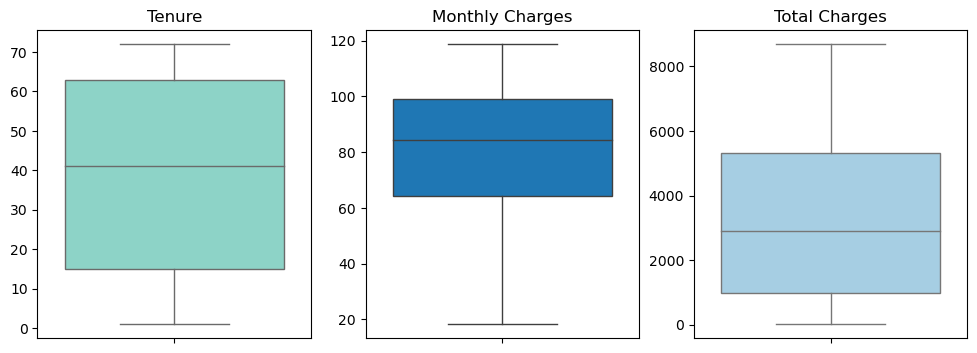

In [21]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.boxplot(data = exp_df,y = exp_df["tenure"], ax=ax[0], linewidth=1, saturation=True, palette="Set3")
sns.boxplot(data = exp_df,y = exp_df.monthlycharges, ax=ax[1], linewidth=1, saturation=True, palette="tab10")
sns.boxplot(data = exp_df,y = exp_df.totalcharges, ax=ax[2], linewidth=1, saturation=True, palette="Paired")
ax[0].set_title("Tenure")
ax[1].set_title("Monthly Charges")
ax[2].set_title("Total Charges")
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
plt.show()

In [22]:

exp_df.describe(include='O').T

,count,unique,top,freq
customerid,29163,7032,8513-OLYGY,9
gender,29163,2,Male,14596
seniorcitizen,29163,2,No,23719
partner,29163,2,Yes,15666
dependents,29163,2,No,20500
contract,29163,3,Month-to-month,14345
paperlessbilling,29163,2,Yes,19203
paymentmethod,29163,4,Electronic check,10446
churn,29163,2,No,21553
service,29163,10,phoneservice,6352


* We can observe the following:
    - Customers can have multiple services
    - The majority of customers not senior citizen
    - The popular contract type is month-to-month about the half of the number of contracts
    - While phone services attract the highest number of customers, their proportion in the overall service offerings is not dominant(6,352 out of 29163) , indicating the firm's popularity in providing a diverse range of services.
    - What is the most important we have more customers than churn customers 

Now let's see which services making the more money and which one is the most popular 

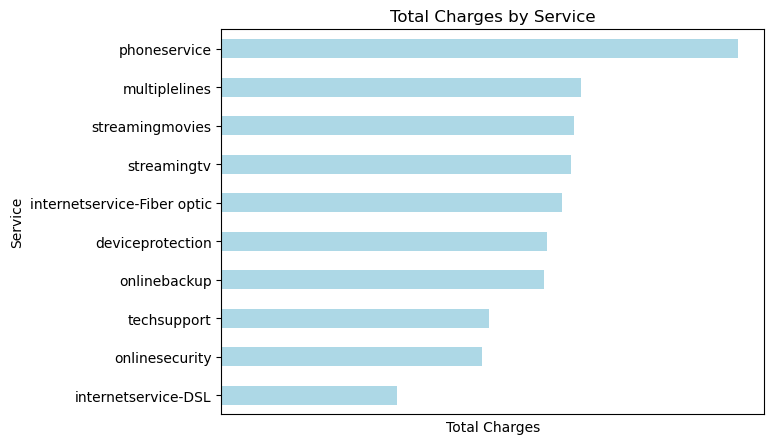

In [23]:
# see which make the most of total revenue
exp_df.groupby('service')['totalcharges'].sum().reset_index().sort_values(
'totalcharges', ascending = True, ignore_index = True).plot(x = 'service', 
                                                            y = 'totalcharges',kind = 'barh', color='lightblue', legend = False, figsize = (7,5))

plt.xlabel('Total Charges')
plt.ylabel('Service')
plt.title('Total Charges by Service')
plt.xticks(ticks=[])
plt.show()

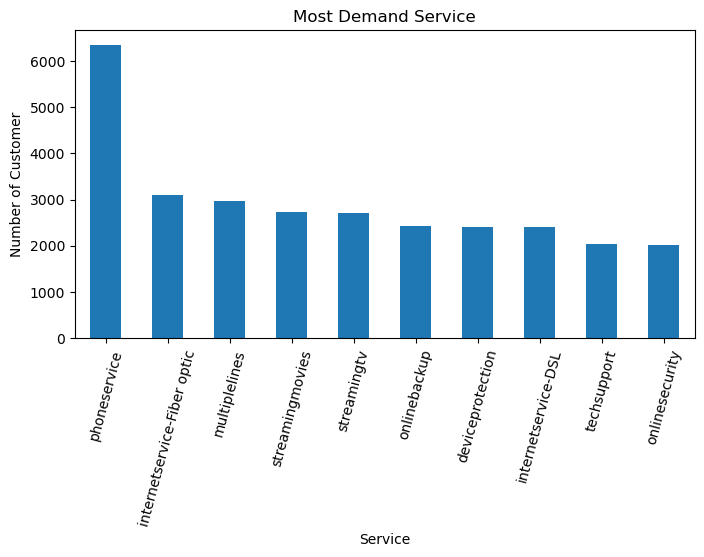

In [24]:
# see which service is most populare
exp_df.groupby('service')['customerid'].nunique().reset_index().sort_values('customerid', 
                                                                            ascending = False).plot(
kind = 'bar', x = 'service', y = 'customerid', figsize = (8,4), legend = False)
plt.title('Most Demand Service')
plt.xticks(rotation = 75)
plt.xlabel("Service")
plt.ylabel("Number of Customer")
plt.show()

Now that we've identified phone services and internet service as the firm's strengths in terms of revenue and demand, it's evident that the number of customers signing up for other services is considerably lower. This presents an opportunity for the firm to promote and enhance awareness of these additional services.

Now I'll start by exploring how customers are charged.

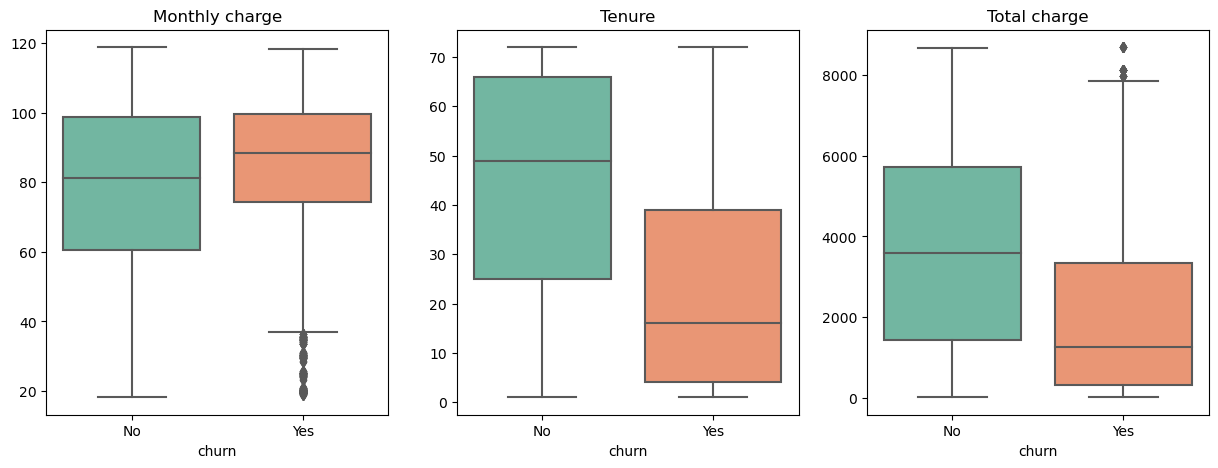

In [25]:
fig, ax = plt.subplots(1,3, figsize = (15,5), sharex= True)
sns.boxplot(data = exp_df, y='monthlycharges', x = 'churn', ax = ax[0], palette= 'Set2')
sns.boxplot(data = exp_df, y='tenure', x = 'churn', ax = ax[1], palette= 'Set2')
sns.boxplot(data = exp_df, y='totalcharges', x = 'churn', ax = ax[2], palette= 'Set2')
ax[0].set_title('Monthly charge')
ax[1].set_title('Tenure')
ax[2].set_title('Total charge')
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
plt.show()

The churn customers have lower tenure and lower total charge as expected but what is interesting their monthly charges is higher compared to customers who remain, so it looks the churn is somehow related to the type of service they sign up for and perhaps they are using services not that popular and this is why they end up paying more and staying less , so now i will explore more about the services  
i will see what kind of service that get higher revenue as well as what is most popular service among the customers 

so now let's see which services is the most expensive

In [26]:
avg_charges = exp_df[['service','monthlycharges']].groupby(['service']
                                                    ).agg({'monthlycharges': "mean"})\
.sort_values('monthlycharges', ascending = False)
avg_charges

,monthlycharges
service,
internetservice-Fiber optic,91.500129
streamingtv,88.770829
streamingmovies,88.478506
deviceprotection,84.853888
onlinebackup,83.106412
multiplelines,82.084766
techsupport,80.718799
onlinesecurity,78.870496
phoneservice,67.239625


#  Service Analysis

now the fiber optic internet service  is the most expensive as well as the streaming tv some others so i will see how many customer sign up for each service customer and compare it between the customers

In [27]:
# creating count tabel for services vs customer chrun 
count_tbl = exp_df.groupby(['service','churn']).agg({
    'customerid' : pd.Series.nunique,
    "monthlycharges": 'mean'}).set_axis(["count","monthlycharge"], axis = 1).sort_values("monthlycharge", ascending= False).reset_index()

# pivot the created tabel
count_tbl = count_tbl.pivot(index=['service'], columns="churn", values='count').fillna(0).set_axis(["count_stay", "count_churn"],axis=1)

count_tbl

,count_stay,count_churn
service,,
deviceprotection,1873,545
internetservice-DSL,1957,459
internetservice-Fiber optic,1799,1297
multiplelines,2117,850
onlinebackup,1902,523
onlinesecurity,1720,295
phoneservice,4653,1699
streamingmovies,1913,818
streamingtv,1889,814


In [28]:
# merging the monthly charge and count table
service_tbl = avg_charges.merge(count_tbl, how = 'inner', left_index= True,right_index= True)
# Chrun rate for each service
service_tbl['churn%'] = ((service_tbl['count_churn']/(service_tbl['count_stay'] + service_tbl['count_churn']))*100).round(2)
# Churn rate of each service from the total customers 
service_tbl['churn%_total'] = ((service_tbl['count_churn']/exp_df['customerid'].nunique())*100).round(2)
service_tbl

,monthlycharges,count_stay,count_churn,churn%,churn%_total
service,,,,,
internetservice-Fiber optic,91.500129,1799,1297,41.89,18.44
streamingtv,88.770829,1889,814,30.11,11.58
streamingmovies,88.478506,1913,818,29.95,11.63
deviceprotection,84.853888,1873,545,22.54,7.75
onlinebackup,83.106412,1902,523,21.57,7.44
multiplelines,82.084766,2117,850,28.65,12.09
techsupport,80.718799,1730,310,15.20,4.41
onlinesecurity,78.870496,1720,295,14.64,4.20
phoneservice,67.239625,4653,1699,26.75,24.16


* So it looks the price can affecting the churn rate, as we can see the Fiber optic have the highest churn rate 
    - the firm need to address this issue and investigate, it could be the quality of the service or the pricing policy offering along with streaming services as 30% to 40% of customers who sign up for this service they churn and make up to 18% of total customers who use this customer have churn
* However it also looks the price not the only factor we can see the phone services have high churn rate so introducing more tailored service packages, along with competitive pricing plans, could be beneficial.

*To gain a clearer perspective, let's organize the data by sorting the table based on the churn rate of total customers and apply the Pareto principle. this will allows us to see where we fail the most*

In [29]:
# sorting the valeus
service_tbl.sort_values('churn%_total' ,ascending = False, inplace= True)
# cumulative percentage
service_tbl['cumulative%'] = service_tbl['churn%_total'].cumsum()
service_tbl

,monthlycharges,count_stay,count_churn,churn%,churn%_total,cumulative%
service,,,,,,
phoneservice,67.239625,4653,1699,26.75,24.16,24.16
internetservice-Fiber optic,91.500129,1799,1297,41.89,18.44,42.60
multiplelines,82.084766,2117,850,28.65,12.09,54.69
streamingmovies,88.478506,1913,818,29.95,11.63,66.32
streamingtv,88.770829,1889,814,30.11,11.58,77.90
deviceprotection,84.853888,1873,545,22.54,7.75,85.65
onlinebackup,83.106412,1902,523,21.57,7.44,93.09
internetservice-DSL,58.088017,1957,459,19.00,6.53,99.62
techsupport,80.718799,1730,310,15.20,4.41,104.03


* so now we can see what services is critical and making the most of the customer churn that will help the firm to make priorities and know where to focus
* 80% of customers churn based on services come from these services:
     - Phone services
     - Internet Fiber Optic
     - Multiple lines
     - Streaming services (TV and Movies)
* The phone service have the highest churn rate out of total customers, the firm need to address its services by understanding the customer and offering a competitive services
* The Fiber optic service have the second highest churn rate, so an investigation of service quality as well as offering the service on more affordable plans or give customers some a better alternative by understanding its need   


The firm should investigate and start working on these services

Let's check these service along with the tenure of customers and the contract type

In [30]:
exp_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,service
1,5575-GNVDE,Male,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No,phoneservice
2,3668-QPYBK,Male,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,phoneservice
4,9237-HQITU,Female,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,phoneservice
5,9305-CDSKC,Female,No,No,No,8,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,phoneservice
6,1452-KIOVK,Male,No,No,Yes,22,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,phoneservice


In [31]:
# create table to plot the relationships
sct_tbl = exp_df[(exp_df['service'].isin(['phoneservice',
                                        'internetservice-Fiber optic','multiplelines','streamingmovies','streamingtv']))
                & (exp_df['churn'] =='Yes')].copy()

# comine the straimng TV and movie to single service which is streaming
sct_tbl['service'] = sct_tbl['service'].replace({"streamingmovies":'streaming','streamingtv':'streaming'})

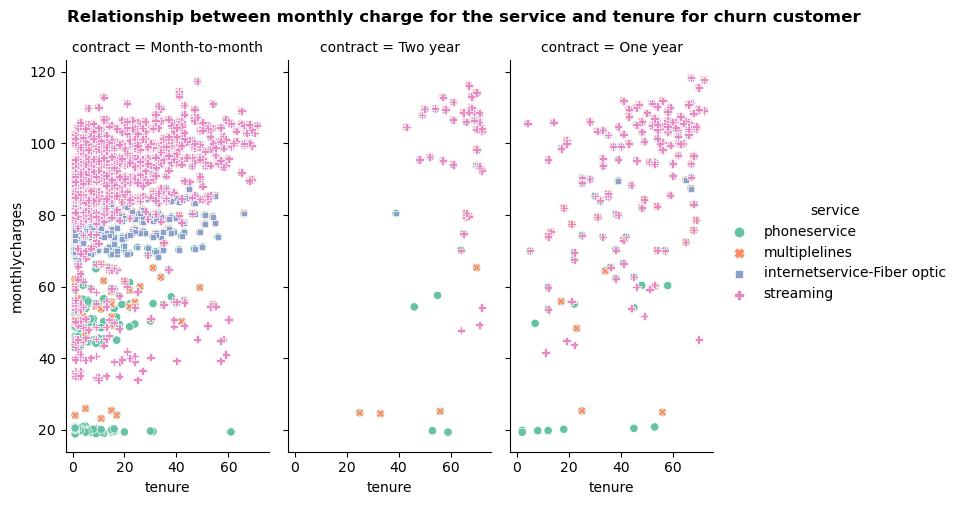

In [32]:
# plotting
g = sns.relplot(sct_tbl, x = 'tenure',y = 'monthlycharges', hue='service', palette= 'Set2',
                style="service",col= 'contract', kind='scatter',
           height=5,aspect=.5)

g.fig.suptitle("Relationship between monthly charge for the service and tenure for churn customer", y=1., fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

* The majority churn customers sign up for month to month contract 
* Phone services have lower monthly charges but also have lower tenure most of customers churn after 20 month
* Majority of churn customers sign up for month to month contract and we can see the month to month contract
* Churn customers who use the streaming service tends to stay more with longer contract 
* Phone services typically month-to-month contract and doesn't show a relationship between charge and tenure so the phone services need major improvement but not in terms of price directly
* The majority of churn customers stayed up to 20 month  


So now i will see how many service each customer sign up for and see if it is correlated to the customer churn 

In [83]:
no_service = exp_df.groupby('customerid')['service'].count().reset_index().sort_values(
    'service',ascending = False, ignore_index = True).set_axis(["customerid",'no_service'],axis = 1)
exp_df = exp_df.merge(no_service, how = 'inner', on = 'customerid')

In [34]:
exp_df[['customerid','contract','churn','service','no_service']].head()

,customerid,contract,churn,service,no_service
0,5575-GNVDE,One year,No,phoneservice,4
1,5575-GNVDE,One year,No,internetservice-DSL,4
2,5575-GNVDE,One year,No,onlinesecurity,4
3,5575-GNVDE,One year,No,deviceprotection,4
4,3668-QPYBK,Month-to-month,Yes,phoneservice,4


In [84]:
exp_df[['no_service']].describe()

,no_service
count,29163.000000
mean,5.436238
std,2.084790
min,1.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,9.000000


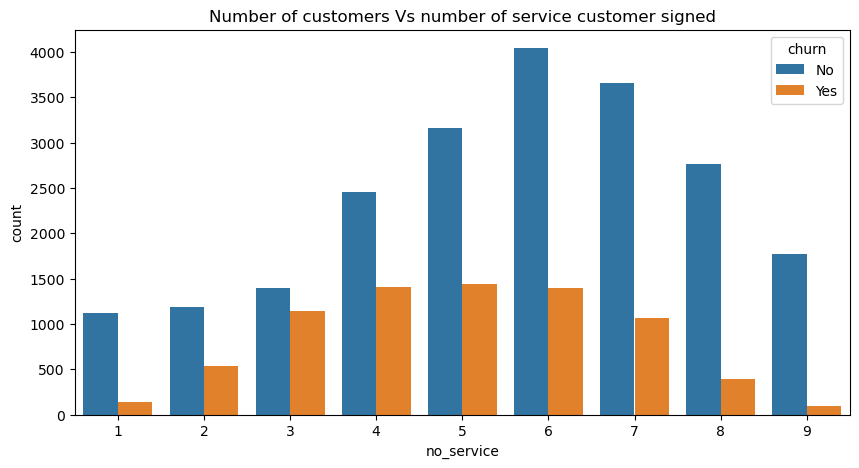

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(exp_df, x = 'no_service', hue= 'churn')
plt.title("Number of customers Vs number of service customer signed")
plt.show()

* The majority of customers sign up for 3 to 7 services and we can see most of customers have 6 services as well as the most churn customers have also sign up for 6 services
* customers with 3 services tend highest churn rate than others
* Customers sign up 3 to 6 services needs attention as these customers have more tendency to churn

I will see which customers who have sign for 3 services

In [85]:
exp_df[exp_df['no_service'] == 3].groupby(['service','churn']).agg({
    'customerid': 'count'}).set_axis(['count'],axis = 1).reset_index().pivot(
    index = 'service', 
    columns = 'churn', 
    values = 'count').set_axis(['count_stay', 'count_churn'],axis = 1).sort_values("count_churn", ascending = False)

,count_stay,count_churn
service,,
phoneservice,361,341
internetservice-Fiber optic,176,255
internetservice-DSL,290,125
multiplelines,91,119
streamingtv,57,83
streamingmovies,61,66
onlinebackup,92,48
deviceprotection,69,44
onlinesecurity,111,38


* The table is sorted by number of customer churn and the result confirm the analysis that Phone services, Fiber optic internet service, Multiple lines, and Streaming services show the highest customer churn.
* DSL service also experiences customer churn
* Customers who sign up for three services require special attention, particularly those with DSL service included


# Machine Learning

Building two models to segment customers for tailored services and predict customer churn to understand the factors influencing customer attrition.
The models include:
1. A clustering model to segment customers.
2. A classification model to predict customer churn.

# 1. Clustering

In [38]:
# Prepare the data
ml_data = df.merge(no_service, on='customerid',how = 'inner') # adding the number of service from previouse analysis
ml_data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,no_service
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


In [39]:
X_data = ml_data.drop(["customerid",'churn'],axis = 1)  # Predictor variables
y = ml_data['churn'].map({'Yes':1,"No":0})         # Target variable

# One Hot encoding 
X = pd.get_dummies(X_data)

labels = pd.get_dummies(X_data).columns.tolist()

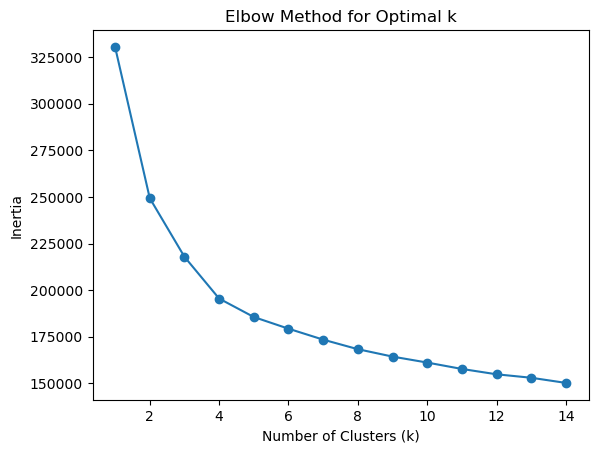

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# scaling the data
X = StandardScaler().fit_transform(X)

# Setting up the model
inertia = []

# Elbow grraph to choose the best k
for k in range (1,15):
    k_means = KMeans(n_clusters= k , init= 'k-means++', n_init= 12, random_state= 44)
    k_means.fit(X)
    inertia.append(k_means.inertia_)

plt.plot(range(1,15), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

From the elbow graph 4 looks the optimal number of cluster so we can group customers to 4 different segments, although the number of cluster can be based on business need

In [41]:
k_means = KMeans(n_clusters= 4 , n_init= 12, init= 'k-means++', random_state= 44)

k_means.fit(X)

# Creating clusters data frame 
clust_df = pd.DataFrame(X, columns=labels)
clust_df['cluster'] = k_means.labels_

In [42]:
# See clusters features
cluster_data = clust_df.groupby('cluster').mean()
cluster_data

,tenure,monthlycharges,totalcharges,no_service,gender_Female,gender_Male,seniorcitizen_No,seniorcitizen_Yes,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.071466,-1.453336,-0.713877,-1.264419,-0.009036,0.009036,0.347570,-0.347570,0.000544,-0.000544,...,-0.796849,-0.414799,0.072480,0.414263,0.610500,-0.610500,-0.002084,0.003561,-0.541976,0.608789
1,-0.024076,-0.758072,-0.345391,-0.255739,-0.022968,0.022968,0.025648,-0.025648,0.056228,-0.056228,...,0.102318,0.003798,0.009602,-0.013577,0.051029,-0.051029,-0.025280,0.021138,-0.008396,0.013640
2,-0.649017,0.293869,-0.459906,-0.129091,0.002744,-0.002744,-0.145968,0.145968,0.348995,-0.348995,...,-0.155570,0.735689,-0.334039,-0.538888,-0.216096,0.216096,-0.177704,-0.193738,0.407372,-0.093350
3,0.887765,0.908659,1.209380,1.152524,0.010329,-0.010329,-0.070769,0.070769,-0.464108,0.464108,...,0.736677,-0.643640,0.371606,0.395824,-0.177681,0.177681,0.236538,0.238097,-0.129342,-0.321233


## How to use this data 
* Now, we can assign labels to the clusters based on their feature values. 
    - Since we scaled the data each feature have an average of 0 , in other word we know compare the value of each feature to zero
    - For instance, in the third cluster, we observe a number of service of value 1.15 above the average value which is 0
    - This indicates that this cluster has a higher proportion of customers who sign up for multiple services compared to the other clusters
    - Additionally, we notice that customers in this cluster do not have partners and show interest in streaming services and they prefer longer contract one year or two year contract on monthly contract which have value of -0.64
* To make it more clear i will give it some color to quickly identify the features that can identify the cluster

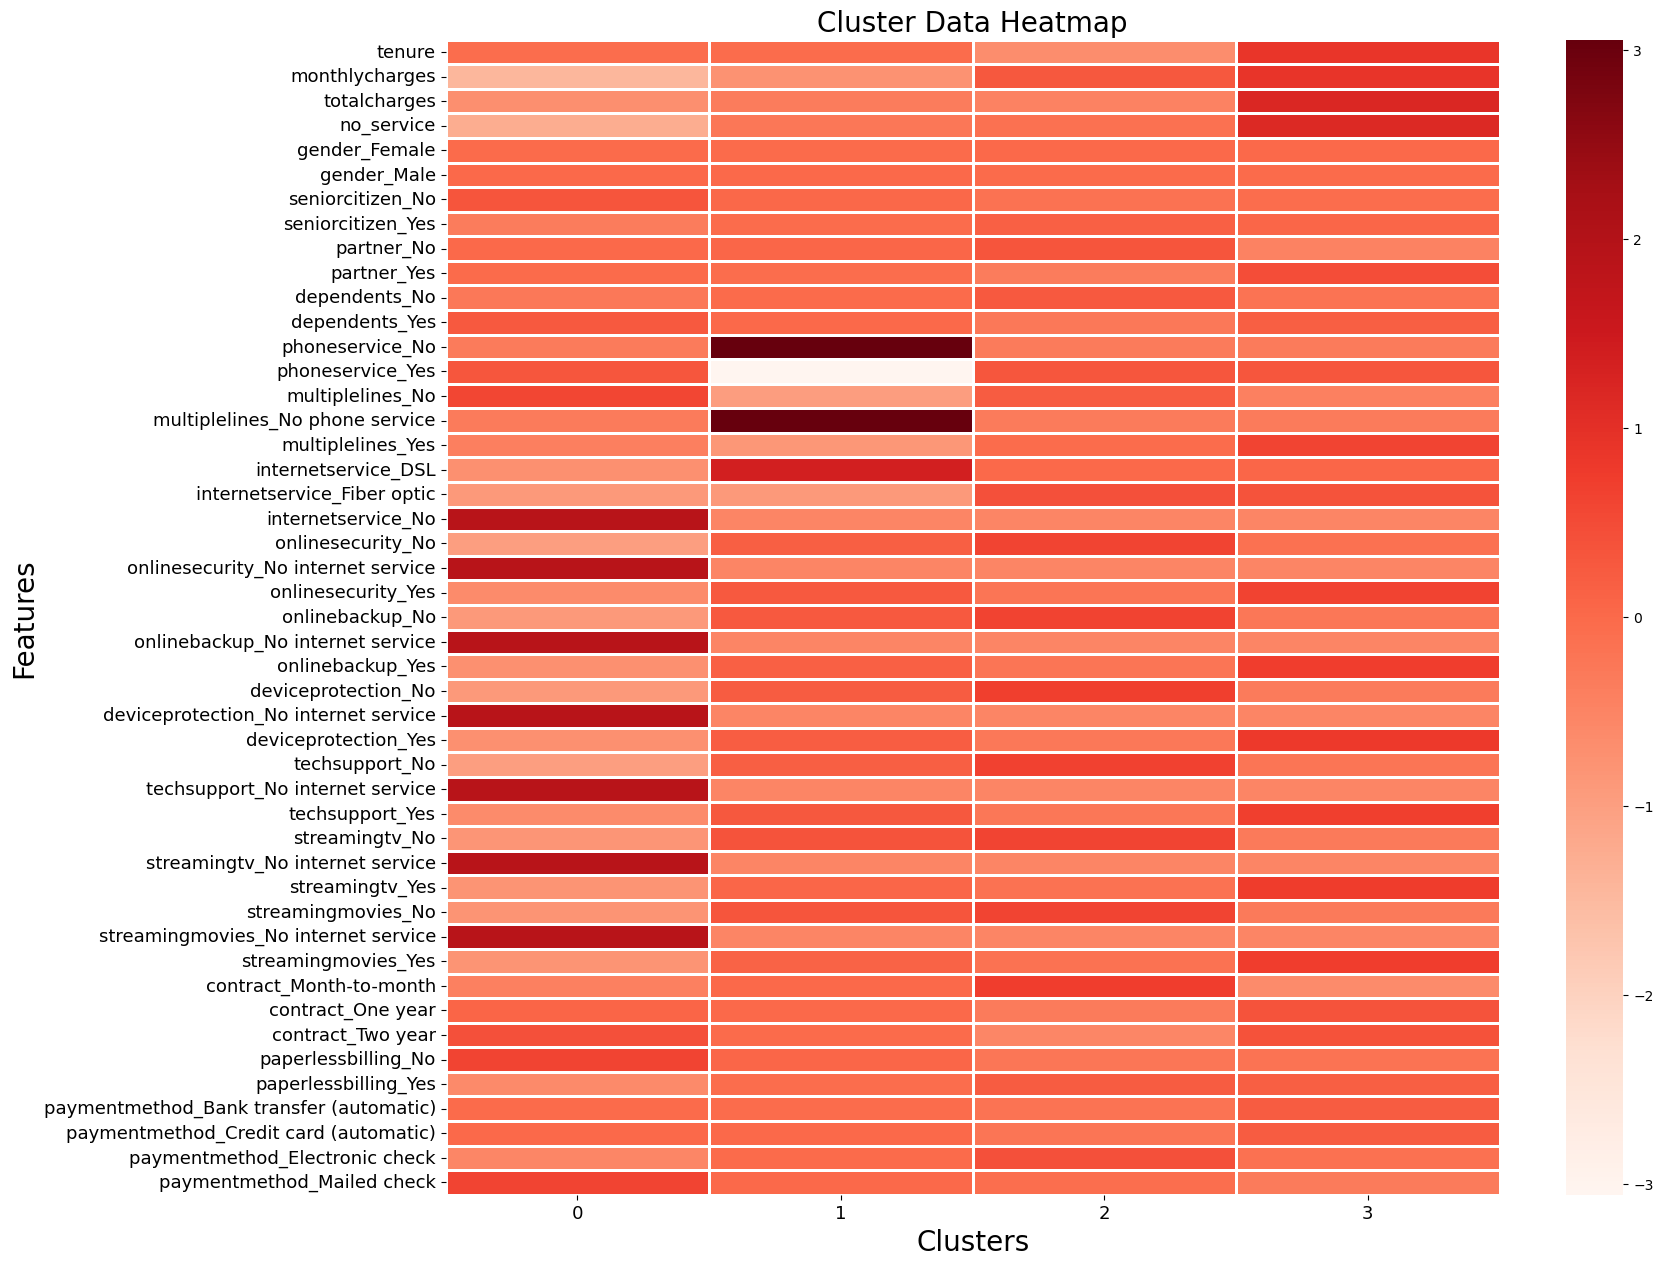

In [43]:
plt.figure(figsize=(17,15))
sns.heatmap(cluster_data.T, cmap= 'Reds', linewidths=1, linecolor= 'white', cbar=True)
plt.title("Cluster Data Heatmap", fontsize=20)
plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Features", fontsize=20)
plt.yticks(ha='right', fontsize=13)
plt.xticks(rotation = 0, fontsize = 13)
plt.show()

The plot serves as a tool to assign labels to clusters and identify customer needs. For instance, by examining the plot, we observe that Cluster 1 has a higher representation of people without phone services and more interested in DSL service. This information allows us to tailor services to customers based on their needs

#  2. Classification

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier

## 2.1 Logistic Regression Model

In [45]:
# Getting the feature importance
log_rfe = RFE(LogisticRegression())
X_rfe_log = log_rfe.fit_transform(X,y)

In [46]:
# number of featres selected
X_rfe_log.shape[1]

23

In [47]:
log_importance = pd.DataFrame({
    'Feature': labels,
    'Ranking': log_rfe.ranking_
}).sort_values('Ranking',ignore_index=True)
log_importance[log_importance['Ranking'] == 1]

,Feature,Ranking
0,tenure,1
1,paymentmethod_Electronic check,1
2,onlinesecurity_No internet service,1
3,onlinesecurity_No,1
4,internetservice_No,1
5,internetservice_Fiber optic,1
6,internetservice_DSL,1
7,techsupport_No,1
8,techsupport_No internet service,1
9,multiplelines_No,1


So these are the most important feature that have the highest impact on logistic regression, so i will use these features to train the model

In [48]:
# Splitting the resulted data from RFE
X_train, X_test, y_train, y_test = train_test_split(X_rfe_log,y,test_size=0.2,random_state= 55)

# Setting the model
log_model = LogisticRegression(solver= "liblinear")

log_param = {
    "C" : [0.01,0.1,1]
           }
log_grid = GridSearchCV(estimator= log_model, param_grid= log_param, cv= 10, scoring='roc_auc', refit= True)

In [49]:
log_grid.fit(X_train, y_train)  # Train the model

y_hat = log_grid.predict(X_test)  # Class Prediction

y_pred = log_grid.predict_proba(X_test) # Probability Prediction

# Evaluation
print("AUC Score: ",roc_auc_score(y_test,y_hat),\
      "\nProbability Lose: ", log_loss(y_test,y_pred),\
     "\nReport: \n", classification_report(y_test,y_hat))

AUC Score:  0.7211484593837535 
Probability Lose:  0.41843884016139854 
Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1050
           1       0.63      0.55      0.59       357

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



In [50]:
log_grid.best_params_

{'C': 1}

## 2.2 XGBoost Classifier Model

In [51]:
# Getting the feature importance
xgb_rfe = RFE(XGBRFClassifier())
X_rfe_xgb = xgb_rfe.fit_transform(X,y)

In [52]:
# Number of Features
X_rfe_xgb.shape[1]

23

In [53]:
# Feature Importance 
xgb_importance = pd.DataFrame({
    'Feature': labels,
    'Ranking': xgb_rfe.ranking_
}).sort_values('Ranking',ignore_index=True)
xgb_importance[log_importance['Ranking'] == 1]

,Feature,Ranking
0,tenure,1
1,contract_Two year,1
2,contract_One year,1
3,contract_Month-to-month,1
4,streamingmovies_Yes,1
5,streamingmovies_No,1
6,streamingtv_No,1
7,techsupport_Yes,1
8,techsupport_No,1
9,paymentmethod_Electronic check,1


In [54]:
# Setting the model
xgb_model = XGBRFClassifier( objective="binary:logistic")

xgb_parm = {
    "learning_rate":[0.01,0.1,0.3,0.5],
    "n_estimators":[None,5,10,15,20]
}

xgb_grid = GridSearchCV(estimator= xgb_model, param_grid= xgb_parm, cv= 10, scoring = "roc_auc")

In [55]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_rfe_xgb,y,test_size=0.2,random_state= 55)

xgb_grid.fit(X_train, y_train)  # Train the model

y_hat = xgb_grid.predict(X_test) # Class prediction

y_pred = xgb_grid.predict_proba(X_test) # Probability Prediction

print("AUC Score: ",roc_auc_score(y_test,y_hat),\
     "\nProbability Lose: ", log_loss(y_test,y_pred),\
     "\nReport: \n", classification_report(y_test,y_hat,zero_division=1))

AUC Score:  0.5 
Probability Lose:  0.5658556182748696 
Report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.85      1050
           1       1.00      0.00      0.00       357

    accuracy                           0.75      1407
   macro avg       0.87      0.50      0.43      1407
weighted avg       0.81      0.75      0.64      1407



In [56]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': None}

## Model Comparison 

* The logistic regression perform better than the XGBoost , with average accuracy of 80% and AUC 72% indicates better discriminatory power, so the logistic regression model is better in this regard. However Precision for class 1 (churn) is 0.63, indicating that when the model predicts churn, it is correct about 63% of the time.
* Recall for class 1 is 0.50, indicating that the model correctly identifies about 50% of the actual churn cases. still better than the XGBoost, the XGBoost model, recall, and F1-score for class 1 are all 0, suggesting that the model is not effectively identifying positive cases
* The logistic regression is the better option

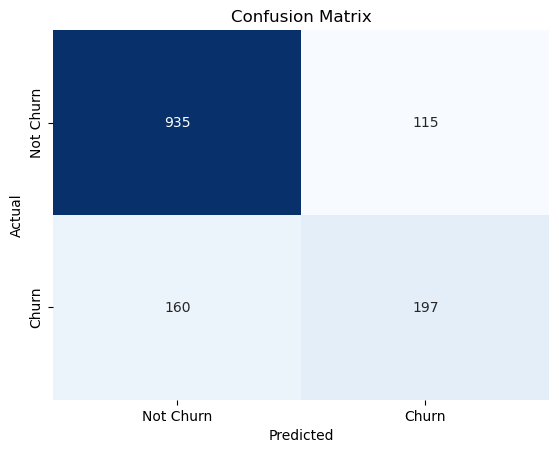

AUC Score: 0.7211484593837535
Log Loss: 0.41843884016139854
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1050
           1       0.63      0.55      0.59       357

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



In [57]:
# The best model for prediction 
best_model = log_grid.best_estimator_

# Splitting the resulted data from RFE logistic model
X_train, X_test, y_train, y_test = train_test_split(X_rfe_log,y,test_size=0.2,random_state= 55)

from sklearn.metrics import confusion_matrix

y_hat = log_grid.predict(X_test)  # Class prediction

# Get predicted probabilities
y_pred = log_grid.predict_proba(X_test)


conf_matrix = confusion_matrix(y_test, y_hat)

# Plotting the confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_hat))
print("Log Loss:", log_loss(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_hat))

## Feature Importance

Now let's see which features impact the most on the churn and in what direction 

In [58]:
importance_df = pd.DataFrame({
    "Feature":log_importance.iloc[:23,0].tolist() ,
    "Importance":best_model.coef_[0],
    "Importance_abs" : abs(best_model.coef_[0])
    
}).sort_values("Importance_abs", ascending = False)
importance_df

,Feature,Importance,Importance_abs
0,tenure,-1.591356,1.591356
2,onlinesecurity_No internet service,0.833974,0.833974
18,paperlessbilling_Yes,0.339016,0.339016
19,no_service,-0.304660,0.304660
1,paymentmethod_Electronic check,-0.273066,0.273066
7,techsupport_No,0.249801,0.249801
5,internetservice_Fiber optic,-0.228114,0.228114
6,internetservice_DSL,-0.208084,0.208084
22,deviceprotection_No internet service,0.176939,0.176939
15,contract_Two year,0.168589,0.168589


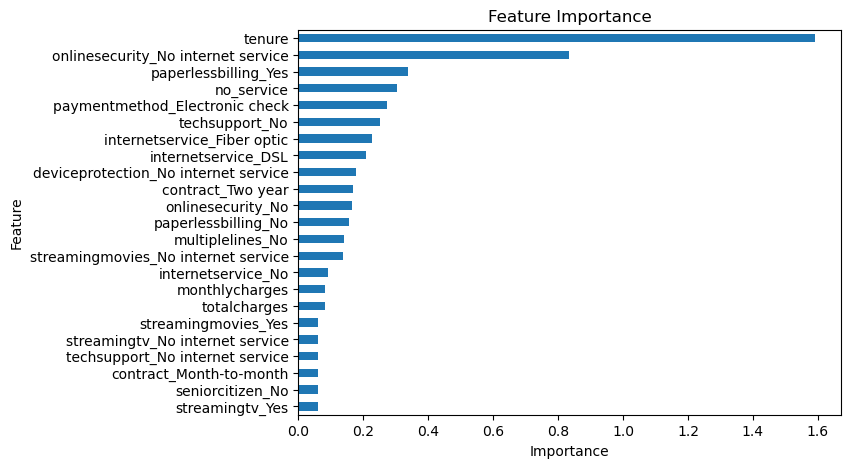

In [59]:
pd.DataFrame({
    "Feature":log_importance.iloc[:23,0].tolist() ,
    "Importance":abs(best_model.coef_[0])
}).sort_values("Importance", ascending = True).plot(x = "Feature",y ="Importance", kind  = 'barh', legend = False, figsize = (7,5))
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### How to use this information and Insights:
From the graph we see the top 3 factors that impact the customer churn is **tenure**, customer who sign up for **online security without internet service** and customers with **paperless billing** to under stand how these factor work and how we can interpret the results i will explain the following:  
1. **Impact of Tenure on Churn:** The most influential factor affecting churn is tenure, and its negative direction implies that longer tenure is linked to a decreased likelihood of churn.

2. **Online security**: A very critical factor with a coefficient of 0.83 and its positive direction means that if a customer has sign up for this service without sign up with internet service, the model predicts an increase in churn by 0.83 units. This 

3. **Number of Services and Churn:** : Also another important factor and the model predicts that customers sign up for multiple service are less likely to churn

4. **Billing Method Influence:** The odds of customer churn increase with the use of paperless billing method.

5. **Payment Method Influence:** The odds of customer churn decrease with the use of electronic checks as the payment method.

6. **Contract Types and Churn:** Two year contracts tend to increase the odds of customer churn.

So this is how we can use this information



**Recommendations:**
To effectively reduce customer churn based on the model insights:

1. Encourage Longer Tenure: Implement strategies to encourage and reward customer loyalty, particularly focusing on those with longer tenure.

2. Encourage customers who sign up for online security services, especially those without internet services to sign up for other services.

3.  promote bundled service packages to customers, as the model indicates that customers who subscribed to multiple services are less likely to churn.


It's important to acknowledge that these factors are highlighted based on their impact, and a holistic approach considering other factors may further refine strategies for reducing customer churn.

## Use the model to make prediction

No let's use the model 

In [60]:
ml_data["churn_prob_pred"] = best_model.predict_proba(X_rfe_log)[:,1] # the customer who  the model predict to churn
ml_data["churn_clas_pred"] = best_model.predict(X_rfe_log) # the probability of custoemr to churn

In [61]:
# Creating data for customers with their probability  to churn
churn_pred_data = ml_data[["customerid","churn","churn_prob_pred","churn_clas_pred"]].groupby("customerid").agg({
    "churn": "first",
    "churn_prob_pred" : "first",
    "churn_clas_pred" : "first"
}).sort_values("churn_prob_pred",ascending = False )

Now we can use this data to spot the customers that are more likely to churn

In [101]:
# Adding the prediction to the exploring data
exp_df = exp_df.merge(ml_data[["customerid","churn_prob_pred","churn_clas_pred"]],on='customerid', how = "inner")
exp_df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,service,no_service,churn_prob_pred,churn_clas_pred
0,5575-GNVDE,Male,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No,phoneservice,4,0.036735,0
1,5575-GNVDE,Male,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No,internetservice-DSL,4,0.036735,0
2,5575-GNVDE,Male,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No,onlinesecurity,4,0.036735,0


# How to use the model and how it  work
so i will take an example and i will select the features that the model predict as it is the most important

In [63]:
# taking exapmle
exp_df[["customerid","tenure","service",
        "paperlessbilling","contract","no_service","churn_prob_pred"]].sort_values("churn_prob_pred",ascending = False, ignore_index=True).head()

,customerid,tenure,service,paperlessbilling,contract,no_service,churn_prob_pred
0,9497-QCMMS,1,streamingmovies,Yes,Month-to-month,5,0.856168
1,9497-QCMMS,1,streamingtv,Yes,Month-to-month,5,0.856168
2,9497-QCMMS,1,internetservice-Fiber optic,Yes,Month-to-month,5,0.856168
3,9497-QCMMS,1,multiplelines,Yes,Month-to-month,5,0.856168
4,9497-QCMMS,1,phoneservice,Yes,Month-to-month,5,0.856168


1. **Identify the Issue** 
Let's take a look at our first customer, who the model predicts has the highest likelihood of churning. We've gathered some important information about this customer:

    - Now, the model tells us that tenure (how long a customer has been with us) is the most crucial factor influencing churn. In other words, customers who have been with us for a longer time are less likely to leave.
    - Additionally, the model suggests that the customers without technical support tends to churn this customer have 5 service without technical support.
   
    
2. **Suggest Solutions** 
    - So to address this customer's potential churn issue, we need to focus on increasing their tenure. If we can encourage this customer to stay with us for a longer period, it's likely to reduce the risk of them leaving.
    - Also we might explore ways to streamline their plan to use technical support service.
 
so this is just an example how we can use the model we can also select all the other feature use the same approachto solve the problem



Also , let's also see which customers the model predict to churn but they not churned yet

In [64]:
exp_df[(exp_df['churn'] == 'No') & (exp_df['churn_clas_pred'] == 1)].groupby("customerid").agg("first").sort_values('churn_prob_pred',ascending = False )[:5]

,gender,seniorcitizen,partner,dependents,tenure,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,service,no_service,churn_prob_pred,churn_clas_pred
customerid,,,,,,,,,,,,,,,
5150-ITWWB,Male,Yes,No,No,3,Month-to-month,Yes,Electronic check,94.85,335.75,No,phoneservice,5,0.849599,1
2545-EBUPK,Female,Yes,No,No,2,Month-to-month,Yes,Electronic check,84.05,186.05,No,phoneservice,4,0.827023,1
6630-UJZMY,Female,Yes,Yes,No,4,Month-to-month,Yes,Electronic check,83.25,308.05,No,phoneservice,4,0.819332,1
0021-IKXGC,Female,Yes,No,No,1,Month-to-month,Yes,Electronic check,72.10,72.10,No,phoneservice,3,0.809407,1
0916-QOFDP,Female,Yes,Yes,Yes,14,Month-to-month,Yes,Electronic check,95.80,1346.30,No,phoneservice,5,0.799222,1


So this is how the model can work and provide actionable insights  

Now, creating customer data sorted by their probability to churn, including the key factors influencing the likelihood of churn so it can be used to identify and solve the problem for each customer based on customer ID

## Creating Data Tables for Modeling and Visualization 

### 1. Combining and Collect Data

In [112]:
# Getting the cluster data
ml_data = ml_data.merge(clust_df[['cluster']], how = 'inner', left_index=True, right_index=True)

# combining cluster data
exp_df = exp_df.merge(ml_data[["customerid",'cluster']], how = 'inner', on = "customerid")

In [114]:
exp_df.sample(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,service,no_service,churn_prob_pred,churn_clas_pred,cluster
9620,0397-GZBBC,Male,Yes,Yes,No,59,Month-to-month,Yes,Bank transfer (automatic),93.85,5574.75,Yes,streamingmovies,5,0.416470,0,3
344,0191-ZHSKZ,Male,Yes,No,No,30,Month-to-month,Yes,Electronic check,74.75,2111.30,No,internetservice-DSL,6,0.282341,0,2
3624,6103-BOCOU,Female,No,No,No,26,Month-to-month,Yes,Electronic check,80.70,2193.00,No,phoneservice,4,0.552151,1,2


In [115]:
# chaning the value of the predicted class to yes for churn and no for not churn
exp_df['churn_clas_pred'].replace({1 : "Yes", 0:"No"}, inplace= True)

# creating tabels to model the data
l = []
q = []
for i in exp_df.columns.tolist():
    if exp_df[i].dtype != 'int64' and exp_df[i].dtype != 'float64' :
        l.append(i)
    else:
        q.append(i)

q.append('customerid')

z = 'tenure'
q[0] = "customerid"
q[-1] = z

In [116]:
# Numeric table
customer_data_numeric = exp_df[q].copy()
customer_data_numeric.head(3)

,customerid,monthlycharges,totalcharges,no_service,churn_prob_pred,tenure
0,5575-GNVDE,56.95,1889.5,4,0.036735,34
1,5575-GNVDE,56.95,1889.5,4,0.036735,34
2,5575-GNVDE,56.95,1889.5,4,0.036735,34


In [117]:
# Dimention tabel
customer_data_dim = exp_df[l].copy()
customer_data_dim.head(3)

,customerid,gender,seniorcitizen,partner,dependents,contract,paperlessbilling,paymentmethod,churn,service,churn_clas_pred,cluster
0,5575-GNVDE,Male,No,No,No,One year,No,Mailed check,No,phoneservice,No,2
1,5575-GNVDE,Male,No,No,No,One year,No,Mailed check,No,internetservice-DSL,No,2
2,5575-GNVDE,Male,No,No,No,One year,No,Mailed check,No,onlinesecurity,No,2


### 2. Creating  Tables 

In [138]:
# Creating customer charge tabel
customer_charg = customer_data_numeric.groupby('customerid').first()

customer_charg.to_csv('customer_charges.csv', index=True)

customer_charg.head(3)

,monthlycharges,totalcharges,no_service,churn_prob_pred,tenure
customerid,,,,,
0002-ORFBO,65.6,593.30,5,0.168755,9
0003-MKNFE,59.9,542.40,4,0.394487,9
0004-TLHLJ,73.9,280.85,3,0.647810,4


In [157]:
# tabel for service
customer_service = customer_data_dim.groupby(['service',"customerid"]).first().drop(["gender","seniorcitizen",
                                                                  "partner","dependents","contract",
                                                                  "paperlessbilling","paymentmethod",
                                                                  "churn","churn_clas_pred","cluster"],axis = 1).reset_index()

customer_service.to_csv('customer_service.csv', index=False)

service_tbl.to_csv("service_data.csv",index= True)

customer_service.head(3)

,customerid,service
0,0002-ORFBO,internetservice-DSL
1,0002-ORFBO,onlinebackup
2,0002-ORFBO,phoneservice


In [141]:
# tabel for customer info
customer_info = customer_data_dim.drop('service', axis = 1).groupby('customerid').first().loc[:,:'dependents']

customer_info.to_csv('customer_info.csv', index=True)

customer_info.head(3)

,gender,seniorcitizen,partner,dependents
customerid,,,,
0002-ORFBO,Female,No,Yes,Yes
0003-MKNFE,Male,No,No,No
0004-TLHLJ,Male,No,No,No


In [153]:
# customer contract and payment method tabel
customer_payment = customer_data_dim.groupby('customerid').first().loc[:,"contract":"paymentmethod"]

customer_payment.to_csv('customer_payment.csv', index=True)

customer_payment.head(3)

,contract,paperlessbilling,paymentmethod
customerid,,,
0002-ORFBO,One year,Yes,Mailed check
0003-MKNFE,Month-to-month,No,Mailed check
0004-TLHLJ,Month-to-month,Yes,Electronic check


In [154]:
# tabel for customers ID and data of churn and cluster
customer_churn_cluster = exp_df[["customerid","churn",
                                 "churn_prob_pred","churn_clas_pred","cluster"]].groupby('customerid').first()

customer_churn_cluster.to_csv('customerID_churn_with_cluster.csv', index=True)


customer_churn_cluster.head(3)

,churn,churn_prob_pred,churn_clas_pred,cluster
customerid,,,,
0002-ORFBO,No,0.168755,No,3
0003-MKNFE,No,0.394487,No,2
0004-TLHLJ,Yes,0.647810,Yes,2


In [156]:
# all the data expect the service 
customer_all = exp_df.groupby('customerid').first().drop('service',axis = 1)

customer_all.to_csv('customer_data.csv', index=True)

customer_all.head(3)

,gender,seniorcitizen,partner,dependents,tenure,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,no_service,churn_prob_pred,churn_clas_pred,cluster
customerid,,,,,,,,,,,,,,,
0002-ORFBO,Female,No,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.30,No,5,0.168755,No,3
0003-MKNFE,Male,No,No,No,9,Month-to-month,No,Mailed check,59.9,542.40,No,4,0.394487,No,2
0004-TLHLJ,Male,No,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,3,0.647810,Yes,2


In [169]:
# Saving the clusted data
cluster_data.to_csv("cluster_data.csv", index= True)

In [118]:
# sample of the final full data 
exp_df.sample(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,service,no_service,churn_prob_pred,churn_clas_pred,cluster
6586,0107-YHINA,Male,No,No,Yes,1,Month-to-month,Yes,Electronic check,99.75,99.75,Yes,streamingmovies,6,0.804032,Yes,2
23010,6599-SFQVE,Female,No,No,No,6,Month-to-month,Yes,Electronic check,55.00,340.40,No,internetservice-DSL,3,0.513433,Yes,2
20582,9689-PTNPG,Male,No,No,No,2,Month-to-month,Yes,Electronic check,80.25,144.55,Yes,streamingtv,3,0.726689,Yes,2
24765,1963-SVUCV,Male,No,No,No,1,Month-to-month,No,Electronic check,45.30,45.30,Yes,internetservice-DSL,2,0.445198,No,2
7399,6651-AZVTJ,Male,No,Yes,Yes,49,Month-to-month,Yes,Electronic check,99.80,4872.45,Yes,phoneservice,6,0.513763,Yes,3
19485,9258-CNWAC,Female,No,Yes,Yes,71,Two year,No,Credit card (automatic),113.65,8166.80,No,phoneservice,9,0.040971,No,3
5386,2272-JKMSI,Female,No,Yes,Yes,62,One year,Yes,Electronic check,110.80,6840.95,No,internetservice-Fiber optic,8,0.220270,No,3
15099,4355-CVPVS,Female,No,Yes,Yes,56,One year,No,Bank transfer (automatic),88.90,4968.00,No,phoneservice,4,0.123363,No,3
2238,4710-FDUIZ,Male,No,Yes,No,56,One year,No,Credit card (automatic),100.30,5614.45,Yes,internetservice-Fiber optic,6,0.180341,No,3
326,5630-AHZIL,Female,No,No,Yes,3,Month-to-month,Yes,Bank transfer (automatic),64.50,177.40,No,techsupport,5,0.274660,No,2
